##### torchvision 제공 이미지 전처리 관련기능
- torchvision.transforms 서브 모듈
    * 이미지 크기 조절
    * 이미지 정규화
    * 이미지 자르기
    * 이미지 회전 등등 다양한 기능 제공
    * 이미지 데이터 타입 ==> Pillow Image

In [35]:
import cv2                              # ==> 이미지 데이터 ndarray
from torchvision import transforms      # pytorch 지원 이미지 변환 관련 모듈
import torch
from PIL import Image                   # %pip install pillow => 이미지 데이터 JpegImage
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# 데이터 관련 설정
IMG_PATH='../image/'
IMG_FILE=IMG_PATH+'pikachu.jpg'

- openCV & pillow <hr>

In [37]:
cv_img=cv2.imread(IMG_FILE)
# cv_img=cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)  # BGR ==> RGB

pil_img=Image.open(IMG_FILE)

In [38]:
print(f'type(cv_img) : {type(cv_img)}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


- ndarray ===> Tensor <hr>

In [39]:
# 일반적인 텐서 생성
cvTensor1=torch.tensor(cv_img)
print(f'cvTensor1 : {cvTensor1.shape}, {cvTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서/위치 자동
cvTensor2=transforms.ToTensor()(cv_img)
print(f'cvTensor2 : {cvTensor2.shape}, {cvTensor2.ndim}D')

cvTensor1 : torch.Size([273, 271, 3]), 3D
cvTensor2 : torch.Size([3, 273, 271]), 3D


In [40]:
# 일반적인 텐서 생성 [H, W, C]
pilTensor1=torch.tensor(np.array(pil_img))
print(f'pilTensor1 : {pilTensor1.shape}, {pilTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서/위치 자동 [C, H, W]
pilTensor2=transforms.ToTensor()(np.array(pil_img))
print(f'pilTensor2 : {pilTensor2.shape}, {pilTensor2.ndim}D')

pilTensor3=transforms.PILToTensor()(pil_img)
print(f'pilTensor3 : {pilTensor3.shape}, {pilTensor3.ndim}D')

pilTensor1 : torch.Size([273, 271, 3]), 3D
pilTensor2 : torch.Size([3, 273, 271]), 3D
pilTensor3 : torch.Size([3, 273, 271]), 3D


- Tensor ==> Ndarray

cNP : (273, 271, 3), 3D


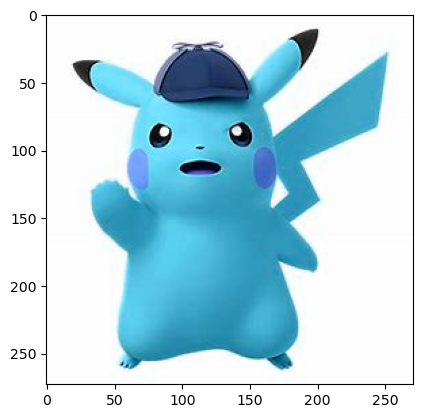

In [41]:
cvNP=cvTensor1.numpy()
print(f'cNP : {cvNP.shape}, {cvNP.ndim}D')

plt.imshow(cvNP)
plt.show()

pilNP : (273, 271, 3), 3D


<function matplotlib.pyplot.show(close=None, block=None)>

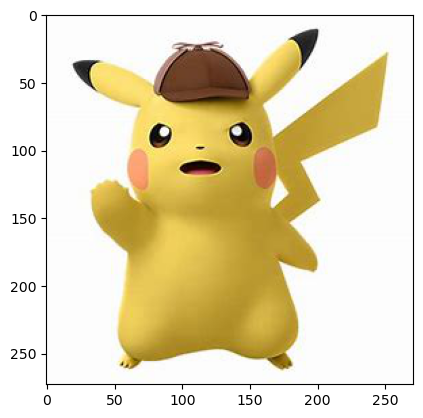

In [42]:
pilNP=pilTensor1.numpy()
print(f'pilNP : {pilNP.shape}, {pilNP.ndim}D')

plt.imshow(pilNP)
plt.show

In [44]:
from torchvision.transforms import v2
type(v2.ToImage()(cv_img))

torchvision.tv_tensors._image.Image

- Tensor ==> PIL Image <hr>